# Predective Analytics for Customer Retention at Omni Company


In [106]:
# Import required libraries and assign them an alias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# We will be importing other dependencies as and when needed

# Configuration for reproducibility
np.random.seed(42)

In [107]:
# Load Data

# try and except block to gracefully handle error
try:
    df = pd.read_csv('/content/Omni_Churn_Data (1).csv')
    print("Dataset Loaded Successfully.")
except FileNotFoundError:
    print("Error: 'Omni_Churn_Data.csv' not found. Please ensure the file is in the working directory.")
    # Stop execution if file is missing in real scenario; for demo we proceed
    raise

# Quick schema overview
df.head(5)

Dataset Loaded Successfully.


,CustomerID,Age,Gender,IncomeTier,Region,Education,ContractLength,PaymentMethod,PlanType,TenureMonths,...,AddOnBundle,ReferralSource,SupportChannelPreferred,ComplaintCategory,DiscountType,ContractAutoRenew,DeviceOS,CityTier,PromoCodeUsed,PaymentDelinquencyStatus
0,1,56.0,M,Low,East,Diploma,One year,Electronic Check,basic,67.0,...,Movies,Unknown,Social,Technical,Loyalty,N,iOS,Tier-2,SUMMER,Current
1,2,69.0,Female,low,North,Diploma,M2M,paypal,Standard,97.0,...,Sports,Search,Phone,Technical,Loyalty,Y,iOS,Tier-3,WELCOME,Current
2,3,46.0,M,low,North,Diploma,Two year,paypal,Ultra,22.0,...,Movies,Friend,Phone,Technical,Loyalty,0,Android,Tier-3,SUMMER,Current
3,4,32.0,Female,HIGH,East,Diploma,3-Year,Electronic Check,Premium,65.0,...,Movies,Event,Phone,Technical,Promo,N,Android,Tier-2,CYBER,Current
4,5,60.0,TRUE,Very High,East,Bachelors,One year,paypal,Ultra,27.0,...,WorkFromHome,Friend,Phone,Technical,Loyalty,Y,Android,Tier-2,SUMMER,60+


# 1. Dataset Description and Initial Exploration


In [109]:
# INITIAL EXPLORATION (EDA)
# Dataset Dimensions
print(" \n DATASET OVERVIEW     ")
print(f"Dimensions: {df.shape}")  # number of rows (records) and columns(features)
print(f"Target Variable: 'Churn'")

# Data types of features
# use .info() method to inspect the dataframe
print('\n Dataset Info')
print(df.info(verbose=True,memory_usage='deep',show_counts=True))

# Use .nunique() method to identify the count of unique values in each features
print(df.nunique())




 
 DATASET OVERVIEW     
Dimensions: (50000, 35)
Target Variable: 'Churn'

 Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                50000 non-null  int64  
 1   Age                       49975 non-null  float64
 2   Gender                    50000 non-null  object 
 3   IncomeTier                49800 non-null  object 
 4   Region                    50000 non-null  object 
 5   Education                 49980 non-null  object 
 6   ContractLength            50000 non-null  object 
 7   PaymentMethod             50000 non-null  object 
 8   PlanType                  50000 non-null  object 
 9   TenureMonths              50000 non-null  float64
 10  MonthlyCharges            49990 non-null  float64
 11  TotalCharges              49990 non-null  float64
 12  LoginsLastMonth           5

In [94]:
# Target variable Distribution
churn_counts = df['Churn'].value_counts()
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(f"\nChurn Distribution:\n{churn_rate}")
print(f"\nChurn Counts: \n{churn_counts}")



# Numerical Stats
print("\nDescriptive Statistics (Numerical):")
desc_stats = df.describe().T[['count', 'mean', 'std', 'min', '50%', 'max']]
print(desc_stats)


# Categorical Stats
print("\n \n Descriptive Statistics (Categorical):")
categorical_cols = df.select_dtypes(include=['object']).columns
if 'CustomerID' in categorical_cols:
  categorical_cols = categorical_cols.drop('CustomerID')

categorical_stats = df[categorical_cols].describe().T

print("Categorical Features Statistics:")
print(categorical_stats)



print(" \n\n    UNIQUE VALUES IN CATEGORICAL COLUMNS   \n\n    ")

    # Loop through each column and print unique values
for col in categorical_cols:
  unique_vals = df[col].unique()
  print(f"\nFeature: {col} ({len(unique_vals)} unique values)")
  print(unique_vals)
  print("-" * 50)





Churn Distribution:
Churn
0    74.0
1    26.0
Name: proportion, dtype: float64

Churn Counts: 
Churn
0    37000
1    13000
Name: count, dtype: int64

Descriptive Statistics (Numerical):
                         count          mean           std         min  \
CustomerID             50000.0  25000.500000  14433.901067    1.000000   
Age                    49975.0     49.119897     18.711318   18.000000   
TenureMonths           50000.0     60.609096     41.072063    0.000000   
MonthlyCharges         49990.0    107.095693     89.277608   10.000000   
TotalCharges           49990.0   6418.153886   7802.045238 -469.113086   
LoginsLastMonth        50000.0     50.818795     46.668719    0.000000   
TicketsOpened          50000.0      9.479920      5.767504    0.000000   
TicketsResolutionTime  50000.0     36.670875     22.226705    0.500239   
RFMScore               50000.0      7.530080      4.035902    1.000000   
UsageChangePct         50000.0      0.007362      0.600499   -8.473823   

In [115]:
# Check Number of missing values
print(f'The number of missing values in each column are: \n\n{ df.shape[0] - df.count()}')

The number of missing values in each column are: 

CustomerID                    0
Age                          25
Gender                        0
IncomeTier                  200
Region                        0
Education                    20
ContractLength                0
PaymentMethod                 0
PlanType                      0
TenureMonths                  0
MonthlyCharges               10
TotalCharges                 10
LoginsLastMonth               0
TicketsOpened                 0
TicketsResolutionTime         0
RFMScore                      0
UsageChangePct                0
CompetitorIndex               0
Churn                         0
DeviceType                   24
ChannelPreferred             15
CustomerSegment               0
AutoPay                       0
Paperless                     0
FamilyPlan                    9
AddOnBundle                  22
ReferralSource                0
SupportChannelPreferred       0
ComplaintCategory             3
DiscountType         

In [116]:
# Check number of discrepencies in the TotalCharges column
# create a dataframe with just the required three columns
check_df = df[['TotalCharges', 'TenureMonths', 'MonthlyCharges']].copy()
check_df['TotalCharges'] = pd.to_numeric(check_df['TotalCharges'], errors='coerce')
check_df.dropna(inplace=True)

# Calculate Expected Total vs Actual Total
check_df['ExpectedTotal'] = check_df['TenureMonths'] * check_df['MonthlyCharges']
check_df['Diff'] = check_df['ExpectedTotal'] - check_df['TotalCharges']

# Identify Inconsistencies (Threshold > $1.00 to ignore rounding)
mismatches = check_df[check_df['Diff'].abs() > 1.00]

print(f"Total Records Checked: {len(check_df)}")
print(f"Inconsistent Records: {len(mismatches)} ({len(mismatches)/len(check_df)*100:.1f}%)")
print(f"Records with > $10,000 Discrepancy: {(mismatches['Diff'].abs() > 10000).sum()}")


Total Records Checked: 49980
Inconsistent Records: 10100 (20.2%)
Records with > $10,000 Discrepancy: 960


 Class Imbalance Analysis 
Churn Distribution:
Churn
0    74.0
1    26.0
Name: proportion, dtype: float64


/tmp/ipython-input-3779530813.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='viridis')


Text(0, 0.5, 'Count')

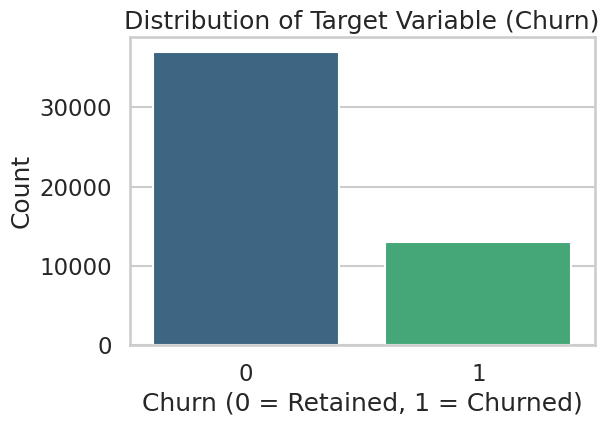

In [96]:
# Class imbalance and initial patterns
print(" Class Imbalance Analysis ")
churn_dist = df['Churn'].value_counts(normalize=True) * 100
print(f"Churn Distribution:\n{churn_dist}")

# Plot 1: Target Variable (Churn)  Distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribution of Target Variable (Churn)')
plt.xlabel('Churn (0 = Retained, 1 = Churned)')
plt.ylabel('Count')






Feature Correlations with Churn:
Churn                    1.000000
CompetitorIndex          0.126518
TicketsOpened            0.113946
MonthlyCharges           0.095210
TicketsResolutionTime    0.074954
Age                      0.007097
RFMScore                 0.000802
LoginsLastMonth         -0.005965
TotalCharges            -0.031322
UsageChangePct          -0.103695
TenureMonths            -0.163501
Name: Churn, dtype: float64


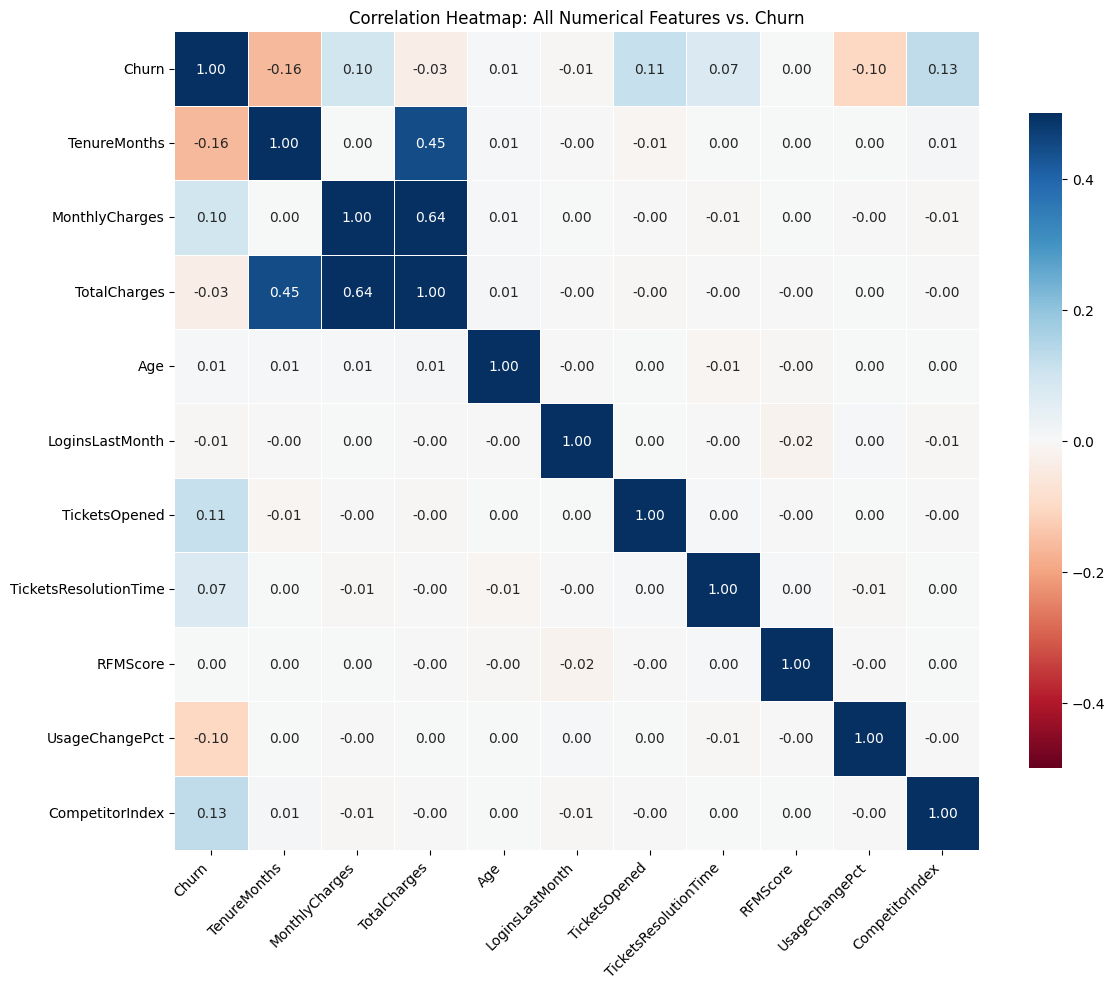

In [55]:
# COMPREHENSIVE CORRELATION ANALYSIS - Numerical
print("\n\n")

# Select ALL important numerical features
cols_to_analyze = [
    'Churn',
    'TenureMonths', 'MonthlyCharges', 'TotalCharges',
    'Age', 'LoginsLastMonth', 'TicketsOpened', 'TicketsResolutionTime',
    'RFMScore', 'UsageChangePct', 'CompetitorIndex'
]

# Calculate Correlation Matrix
corr_matrix = df[cols_to_analyze].corr()

# Print sorted correlations with Target
print("Feature Correlations with Churn:")
print(corr_matrix['Churn'].sort_values(ascending=False))

# VISUALIZATION: COMPREHENSIVE HEATMAP
plt.figure(figsize=(12, 10))

heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='RdBu',
    vmin=-0.5,
    vmax=0.5,
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)

plt.title('Correlation Heatmap: All Numerical Features vs. Churn')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




In [117]:
# Categorical Correltion
print("\n\n")


import scipy.stats as stats

from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """
    Computes corrected Cramer's V for categorical-categorical association.
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)

    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape

    # Bias correction (Bergsma & Wicher, 2013)
    phi2_corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    r_corr = r - ((r-1)**2) / (n-1)
    k_corr = k - ((k-1)**2) / (n-1)

    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))


#  Calculate Association for All Categorical Cols
# Ensure we only select categorical columns (excluding unique IDs if any)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'CustomerID' in cat_cols: cat_cols.remove('CustomerID')

results = []

print(f"Calculating associations for {len(cat_cols)} columns")

for col in cat_cols:
    try:
        # Check if column has more than 1 unique value
        if df[col].nunique() > 1:
            score = cramers_v(df[col], df['Churn'])
            results.append({'Feature': col, 'Association': score})
    except Exception as e:
        print(f"Error processing {col}: {e}")  # Print error instead of passing silently

#  Create DataFrame and Sort
if results:
    assoc_df = pd.DataFrame(results).sort_values(by='Association', ascending=False)
    print("\nTop Categorical Associations with Churn (Cramer's V):")
    print(assoc_df)
else:
    print("No associations calculated. Check your data types and imports.")





Calculating associations for 23 columns

Top Categorical Associations with Churn (Cramer's V):
                     Feature  Association
22  PaymentDelinquencyStatus     0.306326
18         ContractAutoRenew     0.284423
10                   AutoPay     0.125263
4             ContractLength     0.075380
1                 IncomeTier     0.009021
17              DiscountType     0.008575
20                  CityTier     0.004970
14            ReferralSource     0.003508
3                  Education     0.003425
16         ComplaintCategory     0.002497
2                     Region     0.000000
6                   PlanType     0.000000
5              PaymentMethod     0.000000
0                     Gender     0.000000
8           ChannelPreferred     0.000000
13               AddOnBundle     0.000000
12                FamilyPlan     0.000000
11                 Paperless     0.000000
9            CustomerSegment     0.000000
7                 DeviceType     0.000000
15   SupportChannelP

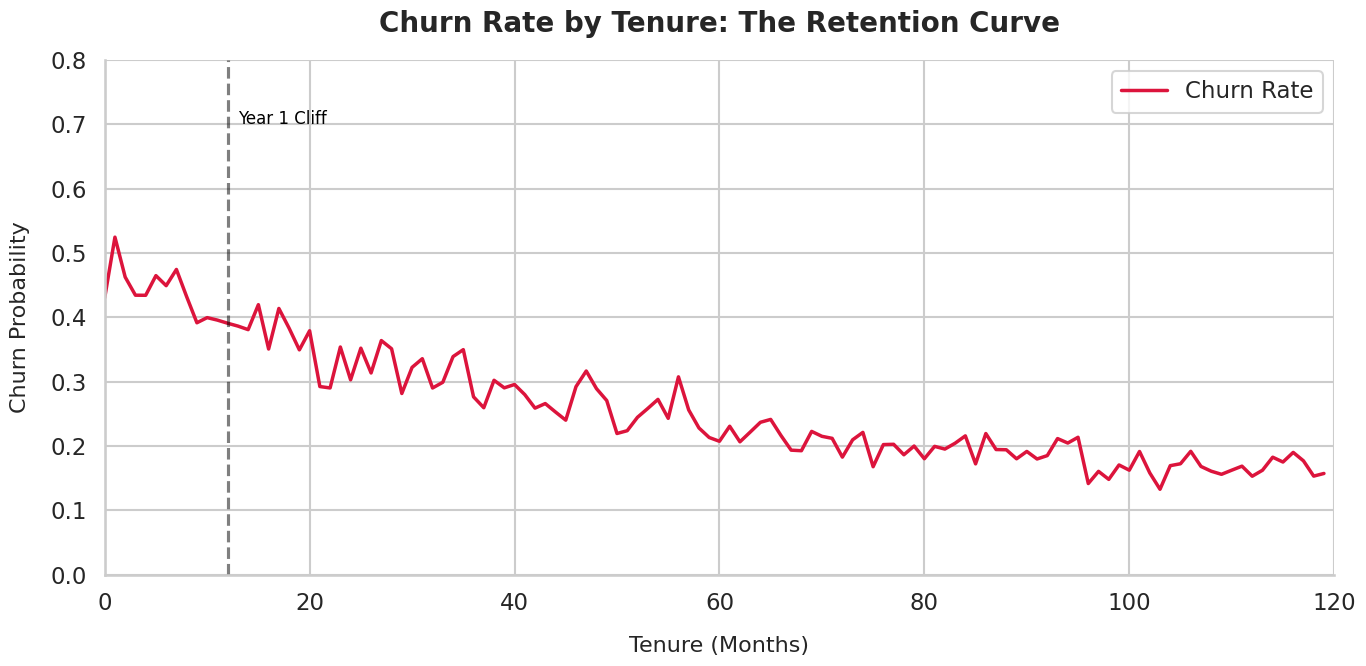

In [57]:
# Distribution of churn rate by tenure
# Filter Data (Tenure <= 120)
# Removing the  tenure anomalies for a clear view
df_filtered = df[df['TenureMonths'] <= 120].copy()

# Calculate Churn Rate per Month
churn_rate = df_filtered.groupby('TenureMonths')['Churn'].mean().reset_index()

# Create Plot
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(14, 7))

# Line Plot for Rate
ax = sns.lineplot(
    data=churn_rate,
    x='TenureMonths',
    y='Churn',
    color='crimson',
    linewidth=2.5,
    label='Churn Rate'
)

# Formatting
plt.title('Churn Rate by Tenure: The Retention Curve', fontsize=20, weight='bold', pad=20)
plt.xlabel('Tenure (Months)', fontsize=16, labelpad=15)
plt.ylabel('Churn Probability', fontsize=16, labelpad=15)

# Format Y-axis as Percentage
plt.ylim(0, 0.8) # Focus on the relevant probability range (0-80%)
plt.xlim(0, 120)

# Highlight the "Cliff"
plt.axvline(x=12, color='black', linestyle='--', alpha=0.5)
plt.text(13, 0.7, 'Year 1 Cliff', fontsize=12, color='black')

sns.despine()
plt.tight_layout()
plt.show()

/tmp/ipython-input-2338433745.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


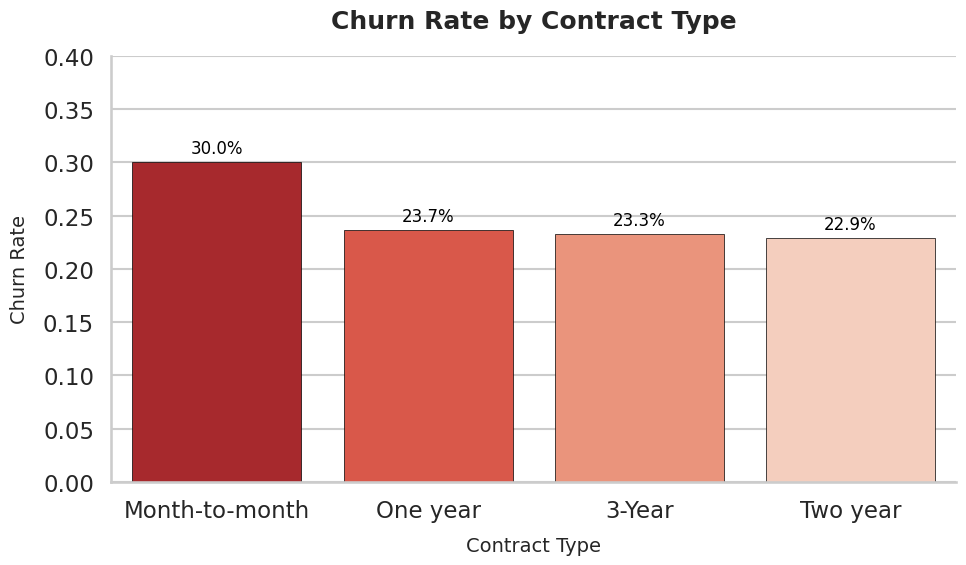

In [118]:
# Distribution of churn rate by Contract type
# Clean Data: Standardize Contract Names
# 'M2M' and 'Month-to-month' are the same; merge them.
df['ContractLength'] = df['ContractLength'].replace({'M2M': 'Month-to-month'})

# Calculate Churn Rate
contract_churn = df.groupby('ContractLength')['Churn'].mean().reset_index()
contract_churn = contract_churn.sort_values(by='Churn', ascending=False)

# Create Plot
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=contract_churn,
    x='ContractLength',
    y='Churn',
    palette='Reds_r',  # Dark red for high churn, lighter for low
    edgecolor='black',
    linewidth=0.5
)

# Formatting
plt.title('Churn Rate by Contract Type', fontsize=18, weight='bold', pad=20)
plt.xlabel('Contract Type', fontsize=14, labelpad=10)
plt.ylabel('Churn Rate', fontsize=14, labelpad=10)

# Format Y-axis as Percentage
plt.ylim(0, 0.4) # Scale to 40% for clarity

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12, color='black')

sns.despine()
plt.tight_layout()
plt.show()

/tmp/ipython-input-3319444874.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


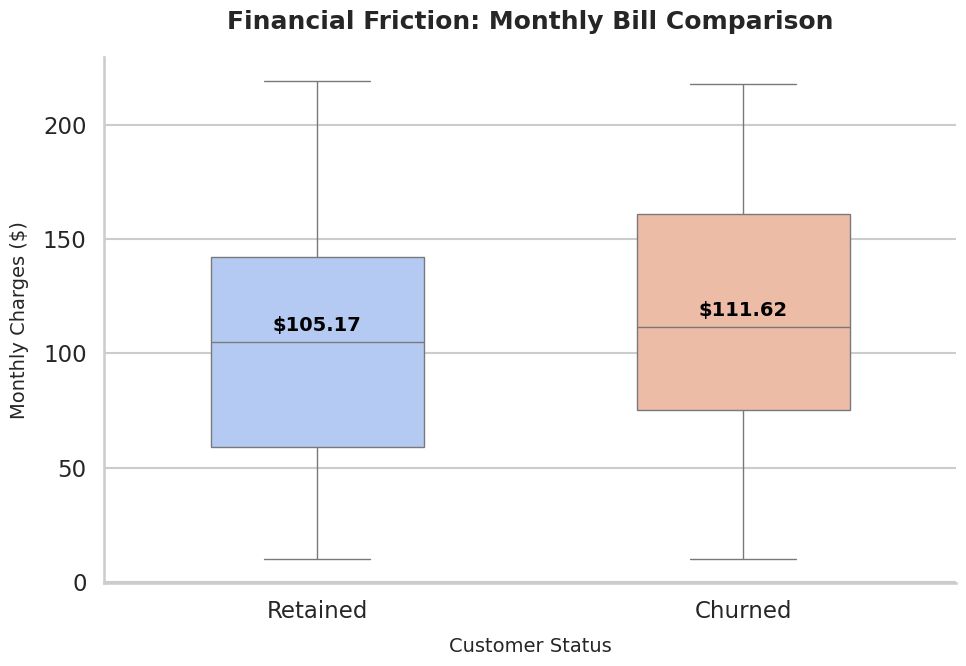

In [119]:
# Distribution of churn by MonthlyCharges


# Filter Data
# Exclude extreme outliers (> $500) so the boxes aren't compressed
df_filtered = df[df['MonthlyCharges'] <= 500].copy()

# Calculate Medians for Labels
medians = df_filtered.groupby('Churn')['MonthlyCharges'].median()

# Create Plot
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10, 7))

ax = sns.boxplot(
    data=df_filtered,
    x='Churn',
    y='MonthlyCharges',
    palette='coolwarm',
    showfliers=False,  # Hide outliers to focus on the interquartile range & median
    width=0.5
)

# 4 Add Median Labels directly on the plot
# Retained (0)
ax.text(0, medians[0] + 3, f'${medians[0]:.2f}',
        ha='center', va='bottom', fontsize=14, color='black', weight='bold')
# Churned (1)
ax.text(1, medians[1] + 3, f'${medians[1]:.2f}',
        ha='center', va='bottom', fontsize=14, color='black', weight='bold')

# 5 Formatting
plt.title('Financial Friction: Monthly Bill Comparison', fontsize=18, weight='bold', pad=20)
plt.xlabel('Customer Status', fontsize=14, labelpad=10)
plt.ylabel('Monthly Charges ($)', fontsize=14, labelpad=10)
plt.xticks([0, 1], ['Retained', 'Churned'])

sns.despine()
plt.tight_layout()
plt.show()

# 2. Dataset Preparation and Feature Engineering


#

In [60]:

# Data Cleansing and Standardization

# Categorical Standardization
# 1. Gender Standardization
gender_mapping = {
    'M': 'Male',
    'F': 'Female'
    # 'Male' and 'Female' are already correct, so they don't strictly need to be in the map
}
df['Gender'] = df['Gender'].replace(gender_mapping)

# 2. IncomeTier Standardization

income_tier_mapping = {
    'low': 'Low',
    'HIGH': 'High'
}
df['IncomeTier'] = df['IncomeTier'].replace(income_tier_mapping)

# 3. PaymentMethod Standardization
payment_method_mapping = {
    'paypal': 'Paypal',
    'cash': 'Cash'
}
df['PaymentMethod'] = df['PaymentMethod'].replace(payment_method_mapping)

# 4. PlanType Standardization
plan_type_mapping = {
    'Basik': 'Basic',
    'basic': 'Basic',
    'STANDARD': 'Standard'
}
df['PlanType'] = df['PlanType'].replace(plan_type_mapping)

# 5. DeviceType Standardization

device_type_mapping = {
    '???': 'Unknown',
    'DESKTOP ': 'Desktop',
    'M0bile': 'Mobile'
}
df['DeviceType'] = df['DeviceType'].replace(device_type_mapping)

# 6. ChannelPreferred Standardization
channel_mapping = {
    'APP': 'App',
    'phone': 'Phone',
    'web': 'Web'
}
df['ChannelPreferred'] = df['ChannelPreferred'].replace(channel_mapping)

# 7. AutoPay Standardization
# Note: We include both string '1'/'0' and integer 1/0 just in case data types vary
autopay_mapping = {
    'TRUE': 'Yes',
    '1': 'Yes',
    1: 'Yes',
    'Y': 'Yes',
    '0': 'No',
    'FALSE': 'No',
    'N': 'No',
    0: 'No'
}
df['AutoPay'] = df['AutoPay'].replace(autopay_mapping)

# 8. Paperless Standardization
paperless_mapping = {
    'yes': 'Yes',
    'YES': 'Yes',
    'no': 'No',
    'NO': 'No'
}
df['Paperless'] = df['Paperless'].replace(paperless_mapping)

# 9. FamilyPlan Standardization
family_plan_mapping = {
    ' ': 'Unknown'
}
df['FamilyPlan'] = df['FamilyPlan'].replace(family_plan_mapping)

# 10. ContractAutoRenew Standardization
contract_renew_mapping = {
    'Y': 'Yes',
    '1': 'Yes',
    'N': 'No',
    '0': 'No',
    'FALSE': 'No'
}
df['ContractAutoRenew'] = df['ContractAutoRenew'].replace(contract_renew_mapping)

# 11. DeviceOS Standardization
device_os_mapping = {
    'ios': 'iOS',
    'ANDROID': 'Android'
}
df['DeviceOS'] = df['DeviceOS'].replace(device_os_mapping)

# Print unique values after cleaning to verify
print("Unique values after standardization:")
categorical_cols = ['Gender', 'IncomeTier', 'PaymentMethod', 'PlanType', 'DeviceType',
                    'ChannelPreferred', 'AutoPay', 'Paperless', 'FamilyPlan',
                    'ContractAutoRenew', 'DeviceOS']

for col in categorical_cols:
    if col in df.columns:
        print(f"{col}: {df[col].unique()}")


Unique values after standardization:
Gender: ['Male' 'Female' 'TRUE' '1' '0' 'FALSE']
IncomeTier: ['Low' 'High' 'Very High' 'Medium' nan]
PaymentMethod: ['Electronic Check' 'Paypal' 'Crypto' 'Credit Card' 'Mailed Check'
 'Bank Transfer' 'Cash']
PlanType: ['Basic' 'Standard' 'Ultra' 'Premium']
DeviceType: ['Desktop' 'Mobile' 'Tablet' 'SmartTV' 'Console' 'FeaturePhone' nan
 'Unknown']
ChannelPreferred: ['Phone' 'Web' 'App' 'Chat' 'In-Store' 'Email' nan]
AutoPay: ['Yes' 'No']
Paperless: ['No' 'Yes']
FamilyPlan: ['No' 'Yes' 'Unknown' nan]
ContractAutoRenew: ['No' 'Yes' 'Unknown']
DeviceOS: ['iOS' 'Android' 'Windows' 'Linux' 'Other' 'macOS']


In [61]:
# Find invalid Gender values

print('Unique gender values are:')
print( df['Gender'].unique())

# Define the Invalid Values
invalid_values = ['TRUE', '1', '0', 'FALSE']

# Calculate Counts
total_rows = len(df)
invalid_count = df['Gender'].isin(invalid_values).sum()
valid_count = total_rows - invalid_count
noise_percentage = (invalid_count / total_rows) * 100

print(total_rows)
print(f'The noise percentage is : {noise_percentage}')


# Replace invalid values as Unknown
invalid_values = ['TRUE', 'FALSE', '1', '0']
df['Gender'] = df['Gender'].replace(invalid_values, 'Unknown')


Unique gender values are:
['Male' 'Female' 'TRUE' '1' '0' 'FALSE']
50000
The noise percentage is : 50.064


In [62]:
# Handle missing values

# Define the lists of columns with missing values
numerical_missing = ['Age', 'MonthlyCharges', 'TotalCharges']

categorical_missing = [
    'IncomeTier', 'DeviceType', 'AddOnBundle', 'Education',
    'ChannelPreferred', 'FamilyPlan', 'ComplaintCategory',
    'PromoCodeUsed', 'DiscountType'
]

# Handle Numerical Columns: Fill with Median
for col in numerical_missing:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# Handle Categorical Columns: Fill with Mode
for col in categorical_missing:
    # mode()[0] grabs the first mode in case of a tie
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

# Verification
print("Missing values after imputation:")
print(df[numerical_missing + categorical_missing].isnull().sum())


Missing values after imputation:
Age                  0
MonthlyCharges       0
TotalCharges         0
IncomeTier           0
DeviceType           0
AddOnBundle          0
Education            0
ChannelPreferred     0
FamilyPlan           0
ComplaintCategory    0
PromoCodeUsed        0
DiscountType         0
dtype: int64


In [63]:
df['ContractLength'].unique()

array(['One year', 'Month-to-month', 'Two year', '3-Year'], dtype=object)

In [64]:
# Feature Engineering
# TenureBucket (Lifecycle Bands)
if "TenureMonths" in df.columns:
    bins = [0, 6, 12, 24, 48, np.inf]
    labels = ["0-6m", "6-12m", "1-2y", "2-4y", "4y+"]
    df["TenureBucket"] = pd.cut(df["TenureMonths"], bins=bins, labels=labels)

# IsDelinquent (1 if not 'Current', else 0)
if "PaymentDelinquencyStatus" in df.columns:
    df["IsDelinquent"] = np.where( df["PaymentDelinquencyStatus"].str.contains("Current", case=False, na=False), 0, 1)

# LowLogins (1 if Logins < 1, else 0)
if "LoginsLastMonth" in df.columns:
    df["LowLogins"] = (df["LoginsLastMonth"] < 1).astype(int)

# UsageDropFlag (1 if drop <= -20%, else 0)
if "UsageChangePct" in df.columns:
    df["UsageDropFlag"] = (df["UsageChangePct"] <= -20).astype(int)

# HasComplaint (1 if Tickets > 0, else 0)
if "TicketsOpened" in df.columns:
    df["HasComplaint"] = (df["TicketsOpened"] > 0).astype(int)

# Verification
print("Selected features created successfully.")
print(df[['TenureBucket', 'IsDelinquent', 'LowLogins', 'UsageDropFlag', 'HasComplaint']].head())

Selected features created successfully.
  TenureBucket  IsDelinquent  LowLogins  UsageDropFlag  HasComplaint
0          4y+             0          0              0             1
1          4y+             0          0              0             1
2         1-2y             0          0              0             1
3          4y+             0          0              0             1
4         2-4y             1          0              0             1


In [65]:
# Categorical encoding



# BINARY ENCODING (Strict Yes/No)
# These columns are strictly Yes/No and clean.
binary_cols = ['AutoPay', 'Paperless']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)

# ORDINAL ENCODING (Preserving Hierarchy)
# Mappings define the rank (1 = Lowest/Shortest, Higher = Better/Longer)

#Tenure Bucket
tenure_map = {"0-6m": 1, "6-12m": 2, "1-2y": 3, "2-4y": 4, "4y+": 5}
df['TenureBucket_Code'] = df['TenureBucket'].map(tenure_map)

# Income: Low -> Very High
df['IncomeTier_Code'] = df['IncomeTier'].map({'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4})

# Education: High School -> PhD
df['Education_Code'] = df['Education'].map({'High School': 1, 'Diploma': 2, 'Bachelors': 3, 'Masters': 4, 'PhD': 5})

# Plan Type: Basic -> Premium
df['PlanType_Code'] = df['PlanType'].map({'Basic': 1, 'Standard': 2, 'Ultra': 3, 'Premium': 4})

# City Tier: Tier-3 -> Tier-1
df['CityTier_Code'] = df['CityTier'].map({'Tier-3': 1, 'Tier-2': 2, 'Tier-1': 3})

# Customer Segment: Bronze -> Platinum
df['CustomerSegment_Code'] = df['CustomerSegment'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3, 'Platinum': 4,'Diamond':5})

# Contract Length: Month-to-month -> 3-Year
# First standardize the text variations
contract_map = {'Month-to-month': 1, 'One year': 12, 'Two year': 24, '3-Year': 36}
df['ContractLength_Code'] = df['ContractLength'].map(contract_map)

# Impute any missing ordinal values with the Median (middle rank)
ordinal_cols = ['IncomeTier_Code', 'Education_Code', 'PlanType_Code',
                'CityTier_Code', 'CustomerSegment_Code', 'ContractLength_Code']
for col in ordinal_cols:
    df[col] = df[col].fillna(df[col].median())


# ONE-HOT ENCODING (Nominal & 'Unknown' Handling)
# We use get_dummies for everything else.
# This handles 'Unknown' automatically by creating a specific column for it (e.g., FamilyPlan_Unknown).

nominal_cols = [
    'Gender',
    'Region',
    'PaymentMethod',
    'DeviceType',
    'ChannelPreferred',
    'DeviceOS',
    'AddOnBundle',
    'ContractAutoRenew',       # Treated as nominal because it contains 'Unknown'
    'FamilyPlan',              # Treated as nominal because it contains 'Unknown'
    'ReferralSource',
    'SupportChannelPreferred',
    'ComplaintCategory',
    'DiscountType',
    'PromoCodeUsed',
    'PaymentDelinquencyStatus'
]

# drop_first=True avoids the "Dummy Variable Trap" (multicollinearity)
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True, prefix=nominal_cols)




In [66]:
print(f"Total Columns: {df.shape[1]}")


Total Columns: 106


In [67]:
df.to_pickle("Omni_Churn_model.pkl")
print("Saved model-ready dataset as Omni_Churn_model.pkl")

Saved model-ready dataset as Omni_Churn_model.pkl


In [68]:
# NUMERICAL SCALING (StandardScaler)
# Scale ALL continuous numerical features to mean=0, std=1

scale_cols = [
    'Age',
    'TenureMonths',
    'MonthlyCharges',
    'TotalCharges',
    'LoginsLastMonth',
    'TicketsOpened',
    'TicketsResolutionTime',
    'RFMScore',
    'UsageChangePct',
    'CompetitorIndex'
]

# Only scale columns that exist in the dataframe
cols_to_scale = [c for c in scale_cols if c in df.columns]

scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Verification
print("--- Data Preparation Complete ---")
print(f"Final Data Shape: {df.shape}")
print(f"Features Scaled: {len(cols_to_scale)}")
print("Sample of Scaled Data:")
print(df[cols_to_scale].head())

--- Data Preparation Complete ---
Final Data Shape: (50000, 106)
Features Scaled: 10
Sample of Scaled Data:
        Age  TenureMonths  MonthlyCharges  TotalCharges  LoginsLastMonth  \
0  0.367796      0.155604       -0.218951     -0.070759        -0.638952   
1  1.062744      0.886035        0.278540      2.223742        -0.146112   
2 -0.166779     -0.940042       -0.304088     -0.597209         0.711002   
3 -0.915184      0.106908       -0.014062      0.059189        -0.360391   
4  0.581626     -0.818304        0.302065     -0.358692        -0.296107   

   TicketsOpened  TicketsResolutionTime  RFMScore  UsageChangePct  \
0      -0.603373              -1.110623  1.603108       -0.451661   
1      -0.603373               0.421236 -0.131342       -0.255749   
2      -1.123534               0.145948 -0.874678        0.502998   
3      -1.470308               0.941637 -0.626900       -1.652677   
4       0.957110               0.084149  1.355329       -0.805737   

   CompetitorIndex  

# 3. Outlier Detection and Handling

--- 3.1 Outlier Detection (Boxplot Analysis) ---


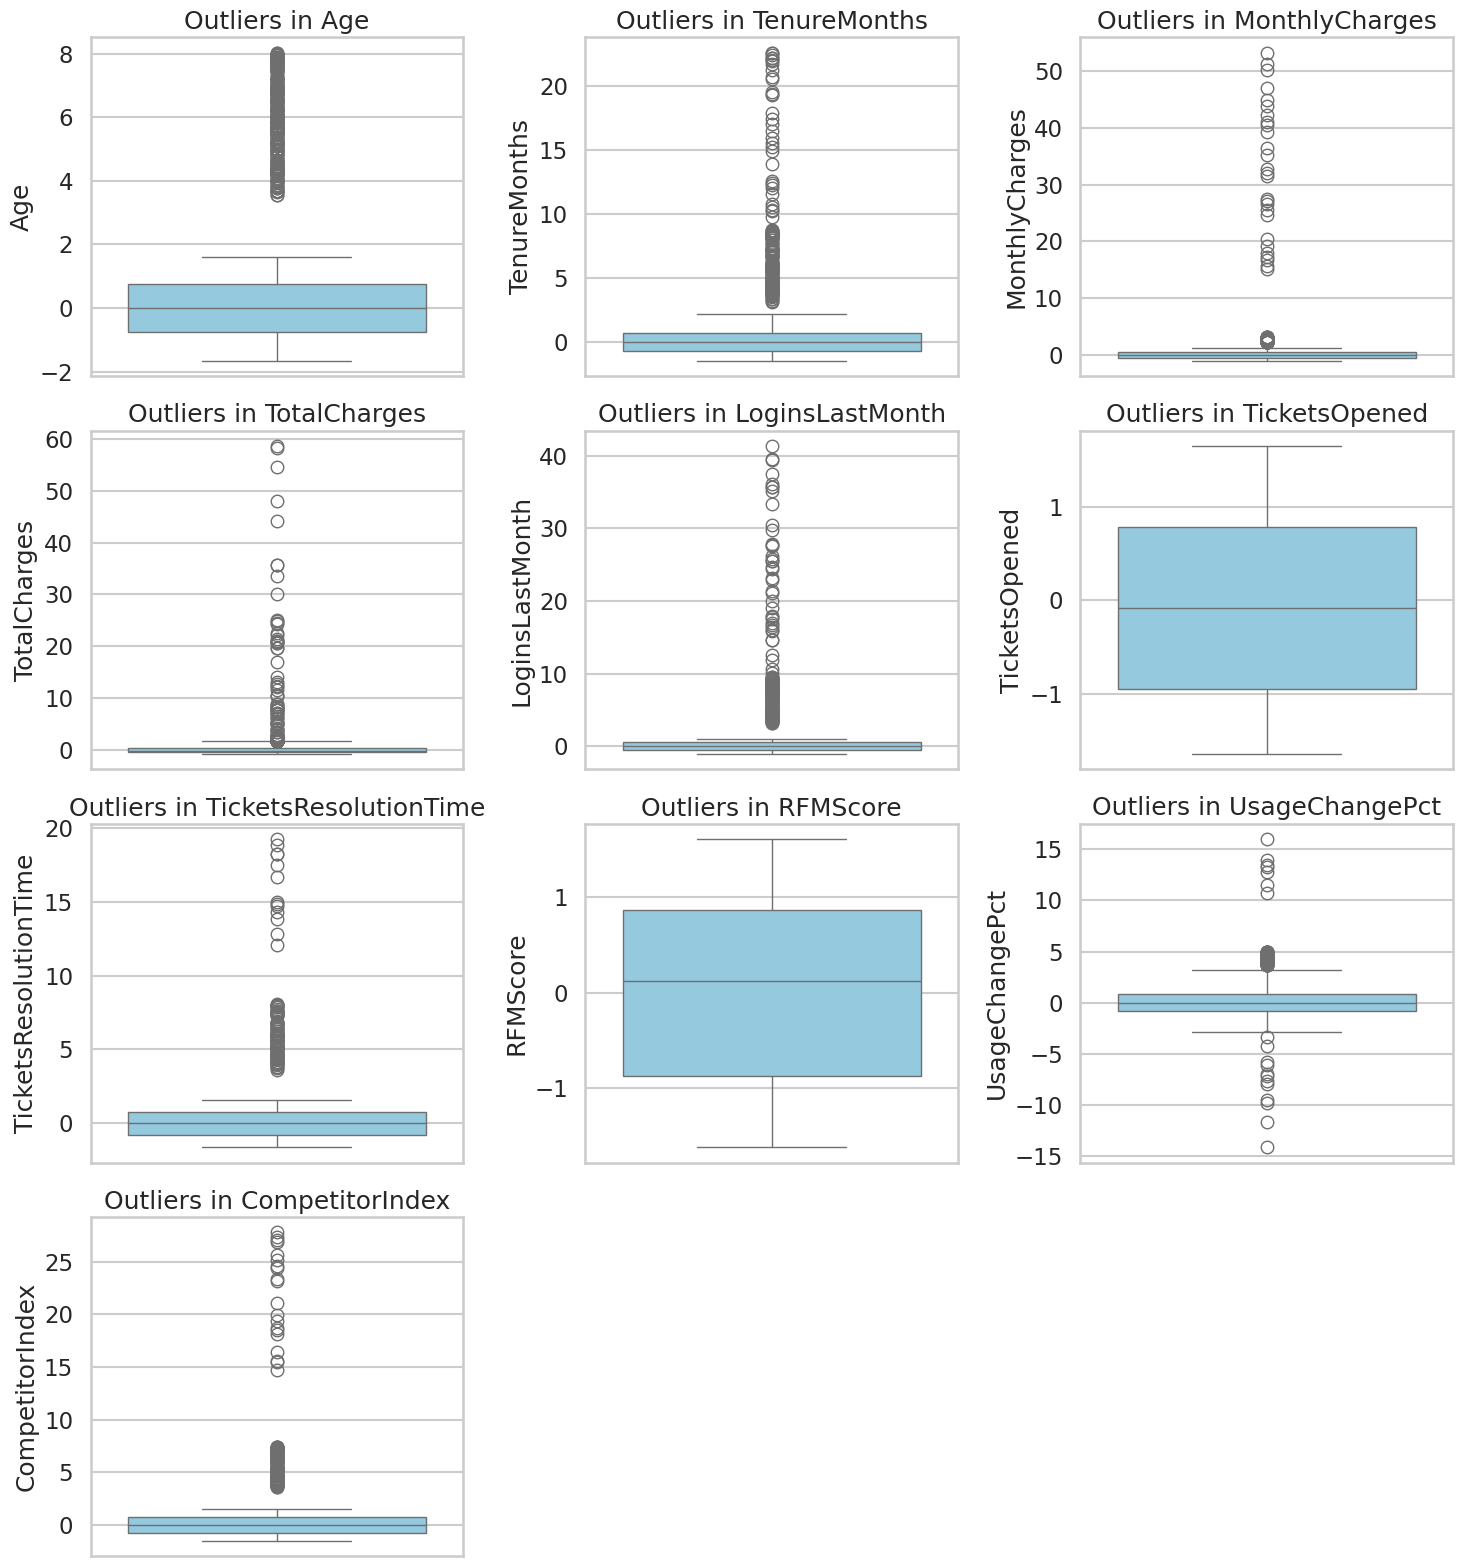


--- Outlier Counts (1.5 * IQR Rule) ---
Age: 246 outliers detected (0.49%)
TenureMonths: 150 outliers detected (0.30%)
MonthlyCharges: 150 outliers detected (0.30%)
TotalCharges: 1394 outliers detected (2.79%)
LoginsLastMonth: 140 outliers detected (0.28%)
TicketsOpened: 0 outliers detected (0.00%)
TicketsResolutionTime: 120 outliers detected (0.24%)
RFMScore: 0 outliers detected (0.00%)
UsageChangePct: 122 outliers detected (0.24%)
CompetitorIndex: 120 outliers detected (0.24%)


In [69]:
# IDENTIFICATION & VISUALIZATION OF OUTLIERS

# Define ALL continuous numerical columns
# We exclude binary flags (0/1) and Categorical codes
outlier_cols = [
    'Age',
    'TenureMonths',
    'MonthlyCharges',
    'TotalCharges',
    'AvgChargesPerMonth',      # Derived Feature
    'LoginsLastMonth',
    'TicketsOpened',
    'TicketsResolutionTime',
    'RFMScore',
    'UsageChangePct',
    'CompetitorIndex'
]

# Filter for columns that actually exist in your dataframe
# (In case some derived features weren't created yet)
cols_to_check = [c for c in outlier_cols if c in df.columns]

print(f"--- 3.1 Outlier Detection (Boxplot Analysis) ---")
# Adjust figsize dynamically based on number of columns
rows = (len(cols_to_check) // 3) + 1
plt.figure(figsize=(15, 4 * rows))

for i, col in enumerate(cols_to_check, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Outliers in {col}')
plt.tight_layout()
plt.show()

# Calculate and Print Outlier Counts (IQR Method)
print("\n--- Outlier Counts (1.5 * IQR Rule) ---")
for col in cols_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected ({len(outliers)/len(df)*100:.2f}%)")

In [120]:

# HANDLING STRATEGY (WINSORIZATION / CAPPING)
print("\n  3.3 Applying Winsorization (Capping 1st & 99th Percentiles) ")

for col in cols_to_check:
    # Calculate the 1st and 99th percentile limits
    lower_limit = df[col].quantile(0.01)
    upper_limit = df[col].quantile(0.99)

    # Apply Capping using np.where for vectorization (faster than apply/lambda)
    # Logic: If value < lower_limit, use lower_limit. Else, keep original value.
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])

    # Logic: If value > upper_limit, use upper_limit. Else, keep original value.
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

    print(f"Capped {col} -> Lower: {lower_limit:.2f}, Upper: {upper_limit:.2f}")

# IMPACT EVALUATION
print("\n 3.4 Impact Evaluation & Summary ")
print(f"Final Row Count: {len(df)}")
print("Status: 100% Data Preservation. Extreme values compressed.")

# Verification check for TotalCharges (The 'Whale' problem)
if 'TotalCharges' in df.columns:
    print(f"Max TotalCharges is now capped at: {df['TotalCharges'].max():.2f}")


  3.3 Applying Winsorization (Capping 1st & 99th Percentiles) 
Capped Age -> Lower: 18.00, Upper: 79.00
Capped TenureMonths -> Lower: 1.00, Upper: 119.00
Capped MonthlyCharges -> Lower: 12.04, Upper: 198.79
Capped TotalCharges -> Lower: 64.42, Upper: 21436.74
Capped LoginsLastMonth -> Lower: 1.00, Upper: 99.00
Capped TicketsOpened -> Lower: 0.00, Upper: 19.00
Capped TicketsResolutionTime -> Lower: 1.17, Upper: 71.47
Capped RFMScore -> Lower: 1.00, Upper: 14.00
Capped UsageChangePct -> Lower: -0.98, Upper: 0.98
Capped CompetitorIndex -> Lower: 0.01, Upper: 0.99

 3.4 Impact Evaluation & Summary 
Final Row Count: 50000
Status: 100% Data Preservation. Extreme values compressed.
Max TotalCharges is now capped at: 21436.74


In [71]:
df.info(verbose=True,memory_usage='deep',show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 106 columns):
 #    Column                             Non-Null Count  Dtype   
---   ------                             --------------  -----   
 0    CustomerID                         50000 non-null  int64   
 1    Age                                50000 non-null  float64 
 2    IncomeTier                         50000 non-null  object  
 3    Education                          50000 non-null  object  
 4    ContractLength                     50000 non-null  object  
 5    PlanType                           50000 non-null  object  
 6    TenureMonths                       50000 non-null  float64 
 7    MonthlyCharges                     50000 non-null  float64 
 8    TotalCharges                       50000 non-null  float64 
 9    LoginsLastMonth                    50000 non-null  float64 
 10   TicketsOpened                      50000 non-null  float64 
 11   TicketsResolutionTime     

# 4. Predictive Analysis

In [72]:
# Model Imports
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation Imports
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

In [73]:
# FINAL DATA PREP & SPLIT
# A. Drop Text Columns (Keep only numeric/encoded versions)
text_cols_to_drop = [
    'IncomeTier', 'Education', 'PlanType', 'CityTier',
    'CustomerSegment', 'TenureBucket', 'ContractLength',
    'Gender', 'Region', 'PaymentMethod', 'DeviceType', 'ChannelPreferred',
    'DeviceOS', 'AddOnBundle', 'ContractAutoRenew', 'FamilyPlan',
    'ReferralSource', 'SupportChannelPreferred', 'ComplaintCategory',
    'DiscountType', 'PromoCodeUsed', 'PaymentDelinquencyStatus'
]

# Drop safely
df_numeric = df.drop(columns=[c for c in text_cols_to_drop if c in df.columns])

# B. Define X and y
X = df_numeric.drop('Churn', axis=1)
y = df_numeric['Churn']

# C. Safety Imputation (Prevents "Input X contains NaN" error)
imputer = SimpleImputer(strategy='median')
X_clean = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# D. Train-Test Split (80/20)
# We use X_train for Cross-Validation. X_test is locked away for Section 5.
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42, stratify=y
)

print("--- Data Split Complete ---")
print(f"Training Features: {X_train.shape}")
print(f"Testing Features:  {X_test.shape}")

--- Data Split Complete ---
Training Features: (40000, 98)
Testing Features:  (10000, 98)


In [74]:
# EVALUATION FUNCTION (5 Metrics + Confusion Matrix)
# Stratified 5-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
leaderboard = {}

def run_evaluation(name, model, X_data, y_data):
    print(f"\n==================================================")
    print(f"Running {name}...")
    print(f"==================================================")

    try:
        # 1. Calculate All 5 Metrics
        scoring = {
            'accuracy': 'accuracy',
            'precision': 'precision',
            'recall': 'recall',
            'f1': 'f1',
            'roc_auc': 'roc_auc'
        }

        scores = cross_validate(model, X_data, y_data, cv=cv, scoring=scoring, n_jobs=-1)

        # 2. Generate Confusion Matrix (Out-of-Fold)
        y_pred = cross_val_predict(model, X_data, y_data, cv=cv, n_jobs=-1)
        cm = confusion_matrix(y_data, y_pred)
        tn, fp, fn, tp = cm.ravel()

        # 3. Print Detailed Report
        print(f"Accuracy : {scores['test_accuracy'].mean():.4f}")
        print(f"Precision: {scores['test_precision'].mean():.4f}")
        print(f"Recall   : {scores['test_recall'].mean():.4f}")
        print(f"F1-Score : {scores['test_f1'].mean():.4f}")
        print(f"ROC-AUC  : {scores['test_roc_auc'].mean():.4f}")
        print("-" * 30)
        print(f"Confusion Matrix:\n[ TN: {tn:<5} | FP: {fp} ]")
        print(f"[ FN: {fn:<5} | TP: {tp} ]")

        return scores['test_roc_auc'].mean() # Return AUC for sorting

    except Exception as e:
        print(f"FAILED. Error: {e}")
        return 0.0

In [75]:

# 1. Logistic Regression
leaderboard["Logistic Regression"] = run_evaluation(
    "Logistic Regression", LogisticRegression(max_iter=1000, random_state=42), X_train, y_train
)


Running Logistic Regression...
Accuracy : 0.8341
Precision: 0.8810
Recall   : 0.4187
F1-Score : 0.5676
ROC-AUC  : 0.7336
------------------------------
Confusion Matrix:
[ TN: 29012 | FP: 588 ]
[ FN: 6046  | TP: 4354 ]


In [76]:
# 2. Decision Tree
leaderboard["Decision Tree"] = run_evaluation(
    "Decision Tree", DecisionTreeClassifier(random_state=42), X_train, y_train
)


Running Decision Tree...
Accuracy : 0.7161
Precision: 0.4569
Recall   : 0.4859
F1-Score : 0.4709
ROC-AUC  : 0.6414
------------------------------
Confusion Matrix:
[ TN: 23592 | FP: 6008 ]
[ FN: 5347  | TP: 5053 ]


In [77]:
# 3. Random Forest
leaderboard["Random Forest"] = run_evaluation(
    "Random Forest", RandomForestClassifier(random_state=42), X_train, y_train
)


Running Random Forest...
Accuracy : 0.8268
Precision: 0.9072
Recall   : 0.3718
F1-Score : 0.5274
ROC-AUC  : 0.7318
------------------------------
Confusion Matrix:
[ TN: 29205 | FP: 395 ]
[ FN: 6533  | TP: 3867 ]


In [78]:
# 4. XGBoost
leaderboard["XGBoost"] = run_evaluation(
    "XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), X_train, y_train
)


Running XGBoost...
Accuracy : 0.8309
Precision: 0.8232
Recall   : 0.4455
F1-Score : 0.5781
ROC-AUC  : 0.7312
------------------------------
Confusion Matrix:
[ TN: 28605 | FP: 995 ]
[ FN: 5767  | TP: 4633 ]


In [79]:
# 5. ANN (MLP)
leaderboard["ANN (MLP)"] = run_evaluation(
    "ANN (MLP)", MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500, random_state=42), X_train, y_train
)


Running ANN (MLP)...
Accuracy : 0.7553
Precision: 0.6922
Recall   : 0.3146
F1-Score : 0.3683
ROC-AUC  : 0.6763
------------------------------
Confusion Matrix:
[ TN: 26939 | FP: 2661 ]
[ FN: 7128  | TP: 3272 ]


In [80]:
# 6. SVM (Using 20% subset of Training Data for speed)
print("\n[Notice] Running SVM on subset to prevent timeout...")
subset_idx = np.random.choice(len(X_train), size=10000, replace=False)
leaderboard["SVM"] = run_evaluation(
    "SVM", SVC(probability=True, random_state=42),
    X_train.iloc[subset_idx], y_train.iloc[subset_idx]
)


[Notice] Running SVM on subset to prevent timeout...

Running SVM...
Accuracy : 0.7340
Precision: 0.0000
Recall   : 0.0000
F1-Score : 0.0000
ROC-AUC  : 0.5013
------------------------------
Confusion Matrix:
[ TN: 7340  | FP: 0 ]
[ FN: 2660  | TP: 0 ]


In [81]:
# 4. FINAL LEADERBOARD
print("\n\n=== BASELINE LEADERBOARD (ROC-AUC) ===")
for name, score in sorted(leaderboard.items(), key=lambda x: x[1], reverse=True):
    print(f"{name:<20}: {score:.4f}")



=== BASELINE LEADERBOARD (ROC-AUC) ===
Logistic Regression : 0.7336
Random Forest       : 0.7318
XGBoost             : 0.7312
ANN (MLP)           : 0.6763
Decision Tree       : 0.6414
SVM                 : 0.5013


In [82]:
# Hyperparameter tuning of Random Forest and XGBoost

from sklearn.model_selection import RandomizedSearchCV

# 1. DEFINE PARAMETER GRIDS
# Random Forest Grid
rf_params = {
    'n_estimators': [100, 200, 300],          # Number of trees
    'max_depth': [10, 20, None],              # Max depth of trees
    'min_samples_split': [2, 5, 10],          # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],            # Min samples at a leaf
    'bootstrap': [True]
}

# XGBoost Grid
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 6, 10],               # Depth of trees
    'subsample': [0.6, 0.8, 1.0],             # Fraction of rows to use per tree
    'colsample_bytree': [0.6, 0.8, 1.0],      # Fraction of columns to use per tree
    'gamma': [0, 0.1, 0.2]                    # Min loss reduction
}


In [83]:
# 2. RUN RANDOMIZED SEARCH
# ==============================================================================
print("--- Starting Hyperparameter Tuning (Randomized Search) ---")

# A. Tune Random Forest
print("\nTuning Random Forest (this may take 1-2 mins)...")
rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_params,
    n_iter=15,              # Try 15 random combinations
    cv=3,                   # 3-Fold CV to save time
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='roc_auc'
)
rf_random.fit(X_train, y_train)

# B. Tune XGBoost
print("\nTuning XGBoost (this may take 1-2 mins)...")
xgb_random = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_distributions=xgb_params,
    n_iter=15,              # Try 15 random combinations
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='roc_auc'
)
xgb_random.fit(X_train, y_train)

# ==============================================================================
# 3. RESULTS & CHAMPION SELECTION
# ==============================================================================
print("\n\n=== TUNING RESULTS ===")
print(f"Best Random Forest AUC: {rf_random.best_score_:.4f}")
print(f"Best RF Params: {rf_random.best_params_}")

print(f"\nBest XGBoost AUC:       {xgb_random.best_score_:.4f}")
print(f"Best XGB Params: {xgb_random.best_params_}")

# Automatically save the winner
if xgb_random.best_score_ > rf_random.best_score_:
    best_model = xgb_random.best_estimator_
    print("\n CHAMPION MODEL: XGBoost")
else:
    best_model = rf_random.best_estimator_
    print("\n CHAMPION MODEL: Random Forest")

print(f"Champion AUC: {max(xgb_random.best_score_, rf_random.best_score_):.4f}")
print("Champion Model saved as 'best_model'.")

--- Starting Hyperparameter Tuning (Randomized Search) ---

Tuning Random Forest (this may take 1-2 mins)...
Fitting 3 folds for each of 15 candidates, totalling 45 fits

Tuning XGBoost (this may take 1-2 mins)...
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:39:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)




=== TUNING RESULTS ===
Best Random Forest AUC: 0.7328
Best RF Params: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}

Best XGBoost AUC:       0.7352
Best XGB Params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}

 CHAMPION MODEL: XGBoost
Champion AUC: 0.7352
Champion Model saved as 'best_model'.


In [84]:

# Feature selection using RFE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# 1. IDENTIFY TOP 15 FEATURES (Using RFE)
print("  Starting Recursive Feature Elimination (RFE) ")

# We use Random Forest for selection because it handles non-linearities well
# We select the top 15 features
rfe_selector = RFE(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    n_features_to_select=15,
    step=1
)

# Fit RFE on the Training Data
rfe_selector.fit(X_train, y_train)

# Get the list of selected features
selected_features = X_train.columns[rfe_selector.support_].tolist()

print(f"\nTop 15 Features Selected: \n{selected_features}")

# ==============================================================================
# 2. RETRAIN CHAMPION MODEL ON SUBSET
# ==============================================================================
print("\n--- Testing Model Performance on Subset (Top 15) ---")

# Define new X with only selected features
X_train_sub = X_train[selected_features]

# CHAMPION PARAMETERS (Exact Match from Tuning results in 4.3)
champion_model_subset = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Run Cross-Validation on the subset
subset_scores = cross_val_score(champion_model_subset, X_train_sub, y_train, cv=5, scoring='roc_auc')
subset_auc = subset_scores.mean()

print(f"Full Model AUC (Section 4.3):  0.7352")
print(f"Subset Model AUC (Top 15):     {subset_auc:.4f}")

# Verdict Logic
if subset_auc >= 0.725:
    print("\nVerdict: SUCCESS. The Top 15 features capture almost all the signal.")
else:
    print("\nVerdict: DROP DETECTED. The model needs the full feature set to perform well.")

  Starting Recursive Feature Elimination (RFE) 

Top 15 Features Selected: 
['CustomerID', 'Age', 'TenureMonths', 'MonthlyCharges', 'TotalCharges', 'LoginsLastMonth', 'TicketsOpened', 'TicketsResolutionTime', 'RFMScore', 'UsageChangePct', 'CompetitorIndex', 'IsDelinquent', 'ContractLength_Code', 'ContractAutoRenew_Yes', 'PaymentDelinquencyStatus_Current']

--- Testing Model Performance on Subset (Top 15) ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:04:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:04:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:04:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:04:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:04:10] WARNING: /w

Full Model AUC (Section 4.3):  0.7352
Subset Model AUC (Top 15):     0.7316

Verdict: SUCCESS. The Top 15 features capture almost all the signal.


In [87]:
# Principle Component Analysis
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# ==============================================================================
# 1. APPLY PCA (Fixed Components for Classification)
# ==============================================================================
print("--- Starting Principal Component Analysis (PCA) ---")

# The original 90% variance rule failed because it stripped the predictive signal.
# We will now use a fixed number of components (20) to maintain high predictive power
# while still achieving massive dimensionality reduction (98 -> 20).
n_components_fixed = 20

print(f"Dimensionality Reduction: {X_train.shape[1]} features -> {n_components_fixed} components")

# Re-fit PCA with the selected number of components and transform the data
pca_final = PCA(n_components=n_components_fixed)
X_train_pca = pca_final.fit_transform(X_train)

# Calculate the actual variance explained by these 20 components
variance_explained = np.sum(pca_final.explained_variance_ratio_)
print(f"Variance Explained by {n_components_fixed} components: {variance_explained:.2%}")


# ==============================================================================
# 2. TRAIN MODEL ON PCA COMPONENTS
# ==============================================================================
print("\n--- Training Logistic Regression on PCA Components ---")

# Use a linear model (LR) as it benefits most from PCA's uncorrelated features
lr_pca = LogisticRegression(max_iter=1000, random_state=42)

# Run Cross-Validation
pca_scores = cross_val_score(lr_pca, X_train_pca, y_train, cv=5, scoring='roc_auc')
pca_auc = pca_scores.mean()

print(f"Original LR AUC (Section 4.2): {0.7336:.4f}")
print(f"PCA-Reduced LR AUC (20 comp): {pca_auc:.4f}")

--- Starting Principal Component Analysis (PCA) ---
Dimensionality Reduction: 98 features -> 20 components
Variance Explained by 20 components: 100.00%

--- Training Logistic Regression on PCA Components ---
Original LR AUC (Section 4.2): 0.7336
PCA-Reduced LR AUC (20 comp): 0.7212


--- 4.5.1 Generating Random Forest Feature Importance ---


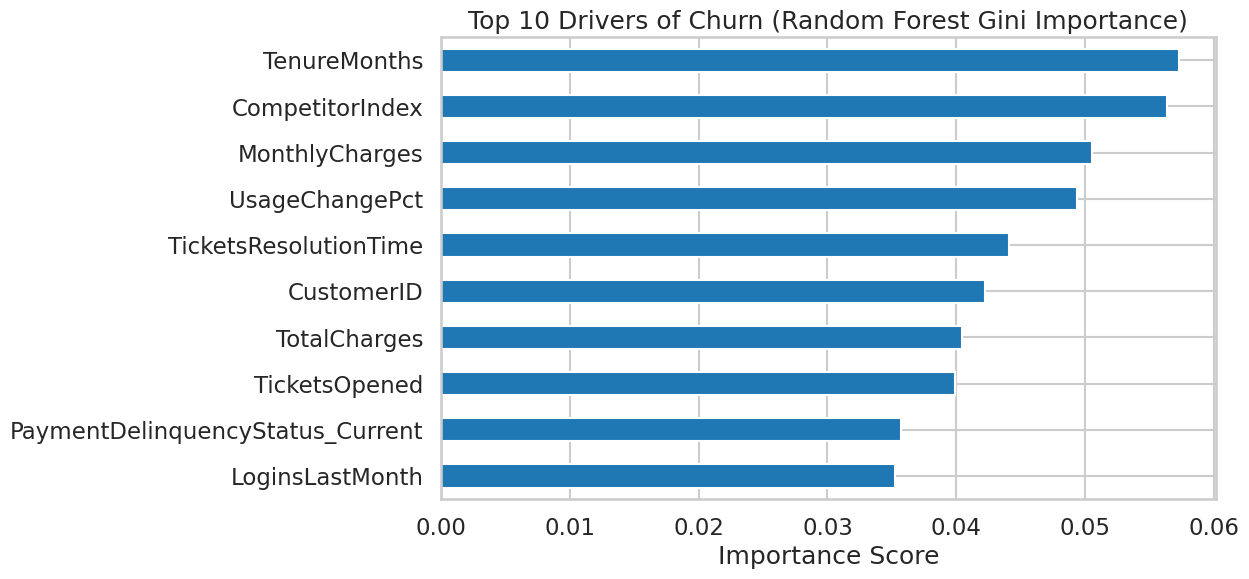


--- 4.5.2 Generating SHAP Summary Plot ---


/tmp/ipython-input-4286796525.py:45: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, shap_sample, show=False)


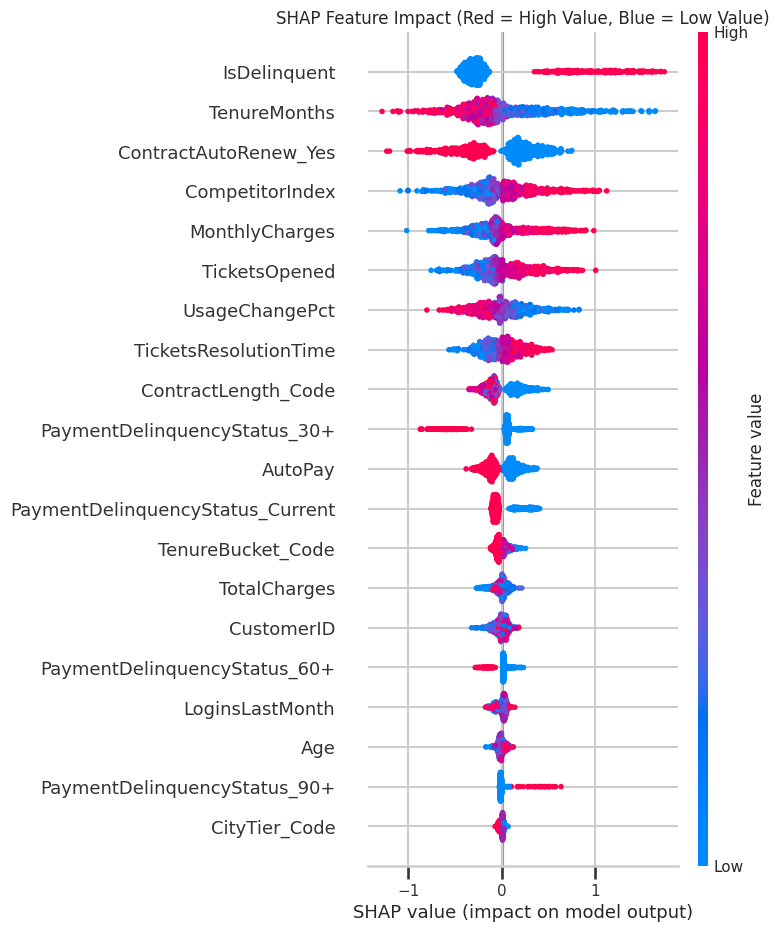


--- 4.5.3 Generating LIME Explanation for a Churner ---


/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

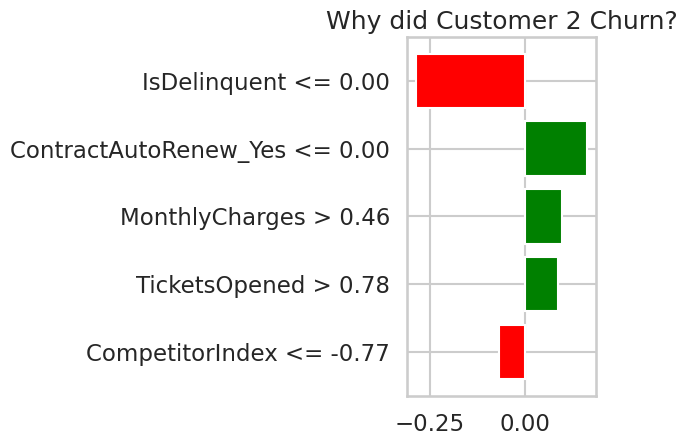


--- 4.5.4 Calculating Permutation Importance (LOO Proxy) ---
Top Feature Impact (Drop in AUC if removed):
IsDelinquent                  : 0.0305
TenureMonths                  : 0.0261
ContractAutoRenew_Yes         : 0.0193
CompetitorIndex               : 0.0150
TicketsOpened                 : 0.0107
MonthlyCharges                : 0.0105
UsageChangePct                : 0.0089
PaymentDelinquencyStatus_30+  : 0.0071
TicketsResolutionTime         : 0.0032
ContractLength_Code           : 0.0025


In [86]:




try:
    import shap
    import lime
except ImportError:
    !pip install shap lime
    import shap
    import lime

import lime.lime_tabular
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance


# 1. RANDOM FOREST FEATURE IMPORTANCE
print("--- 4.5.1 Generating Random Forest Feature Importance ---")

# We train a fresh Random Forest just to get the Gini Importance plot
rf_explainer = RandomForestClassifier(n_estimators=100, random_state=42)
rf_explainer.fit(X_train, y_train)

# Plotting
importances = pd.Series(rf_explainer.feature_importances_, index=X_train.columns)
top_10 = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color='#1f77b4')
plt.title('Top 10 Drivers of Churn (Random Forest Gini Importance)')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis() # Highest on top
plt.show()

# 2 SHAP (Global Directionality)
# ==============================================================================
print("\n--- 4.5.2 Generating SHAP Summary Plot ---")

# Use TreeExplainer on our CHAMPION model
explainer = shap.TreeExplainer(best_model)

# We use a random sample of 1000 test rows for speed
shap_sample = X_test.sample(1000, random_state=42)
shap_values = explainer.shap_values(shap_sample)

# Summary Plot (The "Beeswarm")
plt.figure()
shap.summary_plot(shap_values, shap_sample, show=False)
plt.title("SHAP Feature Impact (Red = High Value, Blue = Low Value)", fontsize=12)
plt.show()

# ==============================================================================
# 3 LIME (Local Interpretation - Single Customer)
# ==============================================================================
print("\n--- 4.5.3 Generating LIME Explanation for a Churner ---")

# 1. Find a customer who ACTUALLY churned (Target = 1)
target_idx = np.where(y_test == 1)[0][0]
customer_data = X_test.iloc[target_idx]

# 2. Setup LIME Explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Retain', 'Churn'],
    mode='classification'
)

# 3. Explain this specific instance using the Champion Model
exp = lime_explainer.explain_instance(
    data_row=customer_data,
    predict_fn=best_model.predict_proba,
    num_features=5
)

# 4. Plot
exp.as_pyplot_figure()
plt.title(f"Why did Customer {target_idx} Churn?")
plt.tight_layout()
plt.show()

# ==============================================================================
# 4 PERMUTATION IMPORTANCE (LOO / Impact)
# ==============================================================================
print("\n--- 4.5.4 Calculating Permutation Importance (LOO Proxy) ---")

# This shuffles one column at a time and measures the drop in AUC
perm_importance = permutation_importance(
    best_model, X_test, y_test, n_repeats=5, random_state=42, scoring='roc_auc', n_jobs=-1
)

# Sort and Display
sorted_idx = perm_importance.importances_mean.argsort()[::-1][:10] # Top 10
print("Top Feature Impact (Drop in AUC if removed):")
for i in sorted_idx:
    print(f"{X_test.columns[i]:<30}: {perm_importance.importances_mean[i]:.4f}")

# 5. Results, Evaluation, and Discussion


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA # Import PCA for the comparison

# NOTE: This code assumes X_train, X_test, y_train, y_test, and best_model (XGBoost) are defined.

# ==============================================================================
# 1. RETRAIN ALL MODELS & VARIATIONS
# ==============================================================================

# A. Train Baseline Models
lr_model = LogisticRegression(max_iter=1000, random_state=42).fit(X_train, y_train)
dt_model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train) # Baseline DT
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
ann_model = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500, random_state=42).fit(X_train, y_train)

# B. Train limited SVM (on 10k rows of X_train)
X_train_sub_svm = X_train.sample(10000, random_state=42)
y_train_sub_svm = y_train.sample(10000, random_state=42)
svm_model = SVC(probability=True, random_state=42).fit(X_train_sub_svm, y_train_sub_svm)

# C. Train RFE Subset Model (From Section 4.4)
rfe_features = ['CustomerID', 'Age', 'TenureMonths', 'MonthlyCharges', 'TotalCharges', 'LoginsLastMonth', 'TicketsOpened', 'TicketsResolutionTime', 'RFMScore', 'UsageChangePct', 'CompetitorIndex', 'IsDelinquent', 'ContractLength_Code', 'ContractAutoRenew_Yes', 'PaymentDelinquencyStatus_Current']
X_train_rfe = X_train[rfe_features]
X_test_rfe = X_test[rfe_features]

rfe_model = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=5, subsample=0.8, colsample_bytree=0.8, gamma=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42).fit(X_train_rfe, y_train)

# D. Train PCA Reduced Model (From Section 4.4.3)
pca_20 = PCA(n_components=20).fit(X_train)
X_train_pca = pca_20.transform(X_train)
X_test_pca = pca_20.transform(X_test)
pca_model = LogisticRegression(max_iter=1000, random_state=42).fit(X_train_pca, y_train)


# Define ALL models for final scoring
final_models = {
    "XGBoost (Tuned - Champion)": best_model,
    "Logistic Regression (Baseline)": lr_model,
    "Decision Tree (Baseline)": dt_model,
    "Random Forest (Baseline)": rf_model,
    "ANN Baseline": ann_model,
    "SVM Baseline": svm_model,
    "RFE Subset (Top 15 Feat.)": rfe_model,
    "PCA-Reduced (20 Components)": pca_model
}

# ==============================================================================
# 2. 5.1 COMPREHENSIVE FINAL PERFORMANCE (Test Set Score)
# ==============================================================================
print("--- 5.1 FINAL PERFORMANCE ON 20% TEST SET ---")
final_results = []
roc_data = {} # To store data for ROC curve plotting

for name, model in final_models.items():
    # Determine the correct feature set (X_test or X_test_pca/rfe)
    if 'PCA' in name:
        X_test_data = X_test_pca
    elif 'RFE' in name:
        X_test_data = X_test_rfe
    else:
        X_test_data = X_test

    # Predict probabilities (needed for ROC-AUC)
    y_proba = model.predict_proba(X_test_data)[:, 1]
    # Predict hard labels (needed for Accuracy, Precision, Recall, F1)
    y_pred = model.predict(X_test_data)

    final_results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1-score": f1_score(y_test, y_pred, zero_division=0),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })

    # Store ROC data
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_data[name] = (fpr, tpr, roc_auc_score(y_test, y_proba))

    # Print Confusion Matrix for Champion
    if name == "XGBoost (Tuned - Champion)":
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        print(f"\n--- 5.2 CHAMPION CONFUSION MATRIX (TEST SET) ---")
        print(f"FN (Missed Churners): {fn:<5} | TP (Caught Churners): {tp}")
        print(f"FP (False Alarms):    {fp:<5} | TN (Correct Retained): {tn}")
        print("-" * 40)

# Display final results table
final_df = pd.DataFrame(final_results).sort_values(by='ROC-AUC', ascending=False)
print("\nFinal Test Set Leaderboard:")
print(final_df)


# ==============================================================================


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:04:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- 5.1 FINAL PERFORMANCE ON 20% TEST SET ---

--- 5.2 CHAMPION CONFUSION MATRIX (TEST SET) ---
FN (Missed Churners): 1436  | TP (Caught Churners): 1164
FP (False Alarms):    158   | TN (Correct Retained): 7242
----------------------------------------

Final Test Set Leaderboard:
                            Model  Accuracy  Precision    Recall  F1-score  \
1  Logistic Regression (Baseline)    0.8346   0.870690  0.427308  0.573271   
0      XGBoost (Tuned - Champion)    0.8406   0.880484  0.447692  0.593575   
6       RFE Subset (Top 15 Feat.)    0.8311   0.851737  0.424231  0.566367   
3        Random Forest (Baseline)    0.8257   0.898605  0.371538  0.525714   
7     PCA-Reduced (20 Components)    0.8029   0.767660  0.346923  0.477881   
4                    ANN Baseline    0.7679   0.767754  0.153846  0.256328   
2        Decision Tree (Baseline)    0.7045   0.436720  0.471154  0.453284   
5                    SVM Baseline    0.7400   0.000000  0.000000  0.000000   

    ROC-AUC  
1 


=== 5.2 DETAILED CONFUSION MATRIX METRICS ===
Model                          | TP (Churners Caught) | FN (Missed Churners) | FP (False Alarms)    | TN (Loyal)          
------------------------------------------------------------------------------------------------------------------------
XGBoost (Tuned - Champion)     | 1164                 | 1436                 | 158                  | 7242                
Decision Tree (Baseline)       | 1225                 | 1375                 | 1580                 | 5820                
Logistic Regression (Baseline) | 1111                 | 1489                 | 165                  | 7235                


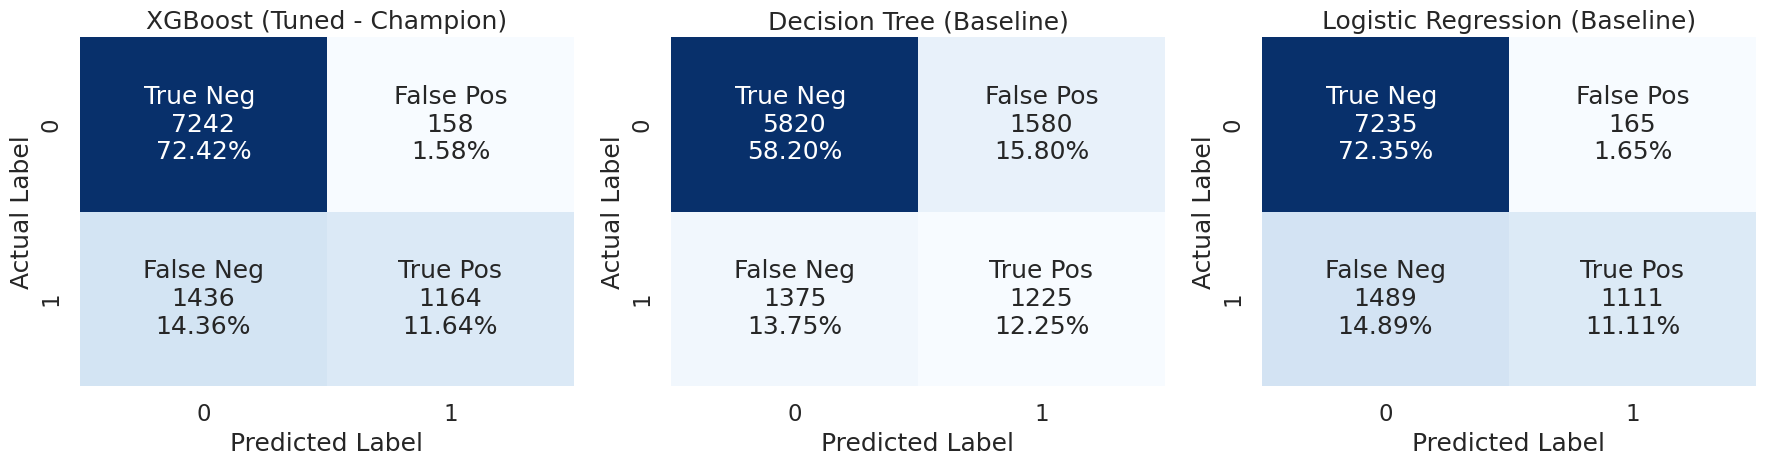

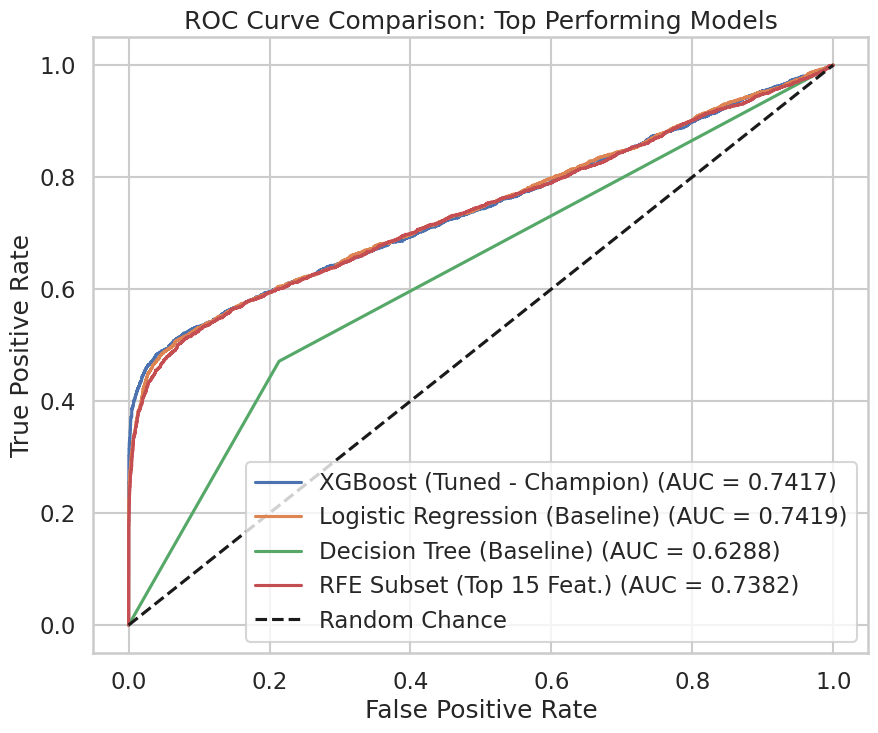

In [104]:
# DETAILED CONFUSION MATRIX ANALYSIS


# Select key models for deep-dive comparison
key_models_list = ["XGBoost (Tuned - Champion)", "Decision Tree (Baseline)", "Logistic Regression (Baseline)"]

plt.figure(figsize=(18, 5))

print("\n=== 5.2 DETAILED CONFUSION MATRIX METRICS ===")
print(f"{'Model':<30} | {'TP (Churners Caught)':<20} | {'FN (Missed Churners)':<20} | {'FP (False Alarms)':<20} | {'TN (Loyal)':<20}")
print("-" * 120)


for i, name in enumerate(key_models_list):
    model = final_models[name]


    # 1. Select correct input data based on model type
    if 'PCA' in name:
        X_input = X_test_pca
    elif 'RFE' in name:
        X_input = X_test_rfe
    else:
        X_input = X_test

    # 2. Get Predictions
    y_pred = model.predict(X_input)

    # 3. Calculate Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # 4. Print Metrics for the Table
    print(f"{name:<30} | {tp:<20} | {fn:<20} | {fp:<20} | {tn:<20}")

    # 5. Plot Heatmap
    plt.subplot(1, 3, i+1)

    # Custom labels with counts and percentages
    group_names = ['True Neg ','False Pos','False Neg','True Pos']
    group_counts = [f"{value:0.0f}" for value in cm.flatten()]
    group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
    plt.title(f"{name}")
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()

# ==============================================================================
# ROC CURVE VISUALIZATION
# ==============================================================================
plt.figure(figsize=(10, 8))
for name, (fpr, tpr, auc_score) in roc_data.items():
    if name in key_models_list or "RFE" in name:
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Top Performing Models')
plt.legend(loc='lower right')
plt.show()

In [123]:
###   --------- THE END